In [1]:
# import dsoclasses
from dsoclasses.rinex.doris.rinex import DorisRinex
from dsoclasses.time.pyattotime import at2pt

In [2]:
# set the name of the DORIS RINEX file to use
drinex = "../data/s6arx24001.001"

In [3]:
# create a DORIS RINEX instance; this will parse the data file's header
rnx = DorisRinex(drinex)

# All beacons recorded in the RINEX, are available in the instance's 
# 'beacons' list, each with its own info.
for beacon in rnx.beacons:
    print('Domes {:9s} Id {:4s} Name {:20s} Type {:1d} Num {:3s}'.format(beacon['domes'], beacon['id'], beacon['name'], beacon['type'], beacon['num']))

Domes 49804S004 Id COBB Name COLD BAY             Type 3 Num D01
Domes 40127S009 Id YEMB Name YELLOWKNIFE          Type 4 Num D02
Domes 43001S005 Id THUB Name THULE                Type 3 Num D03
Domes 40405S043 Id GONC Name GOLDSTONE            Type 4 Num D04
Domes 40451S178 Id GRFB Name GREENBELT            Type 3 Num D05
Domes 40503S006 Id SOFC Name SOCORRO              Type 3 Num D06
Domes 49914S003 Id MIAB Name MIAMI                Type 4 Num D07
Domes 41201S002 Id MNAC Name MANAGUA              Type 3 Num D08
Domes 42005S003 Id SCSC Name SANTA CRUZ           Type 4 Num D09
Domes 97205S001 Id LAOB Name LE LAMENTIN          Type 3 Num D10
Domes 97301S006 Id KRWB Name KOUROU               Type 4 Num D11
Domes 41508S005 Id SJVC Name SAN JUAN             Type 4 Num D12
Domes 41781S001 Id HROC Name HANGA ROA            Type 4 Num D13
Domes 41507S008 Id RISC Name RIO GRANDE           Type 3 Num D14
Domes 66018S002 Id BEMB Name BELGRANO             Type 3 Num D15
Domes 30604S003 Id TRJB N

In [4]:
# Select a DORIS beacon (out of the RINEX list) to extract data
diob = 'D31'

# store here arrays to plot (time and temperature)
t = []; T = [];

# loop through all data blocks ...
for block in rnx:
    # loop through all beacons of the data block ...
    for beacon, data in block:
        # now k is the beacon id (e.f. 'D01') and v holds the measured data, e.g. 
        # {'L1': {'value': -2446791.601, 'm1': None, 'm2': None}, 'L2': {'value': -3849973.536, 'm1': None, 'm2': None}, 'C1': ..., 'H': {'value': 70.005, 'm1': None, 'm2': 1}}
        if beacon == diob:
            # this is the beacon we want, get the measured temperature
            print("{:} {:.2f}".format(block.t().strftime("%y/%m/%d %H:%M:%S"), data['T']['value']))
            # store values to plot later on
            t.append(block.t())
            T.append(data['T']['value'])

24/01/01 03:24:20 11.00
24/01/01 03:24:27 11.00
24/01/01 03:24:30 11.00
24/01/01 03:24:37 11.00
24/01/01 03:24:40 11.00
24/01/01 03:24:47 11.00
24/01/01 03:24:50 11.00
24/01/01 05:09:30 11.00
24/01/01 05:09:37 11.00
24/01/01 05:09:40 11.00
24/01/01 05:09:47 11.00
24/01/01 05:09:50 11.00
24/01/01 05:09:57 11.00
24/01/01 05:10:00 11.00
24/01/01 05:10:07 11.00
24/01/01 05:10:10 11.00
24/01/01 05:10:17 11.00
24/01/01 05:10:20 11.00
24/01/01 05:10:27 11.00
24/01/01 05:10:30 11.00
24/01/01 05:10:37 11.00
24/01/01 05:10:40 11.00
24/01/01 05:10:47 11.00
24/01/01 05:10:50 11.00
24/01/01 05:10:57 11.00
24/01/01 05:11:00 11.00
24/01/01 05:11:07 11.00
24/01/01 05:11:10 11.00
24/01/01 05:11:17 11.00
24/01/01 05:11:20 11.00
24/01/01 05:11:27 11.00
24/01/01 05:11:30 11.00
24/01/01 05:11:37 11.00
24/01/01 05:11:40 11.00
24/01/01 05:11:47 11.00
24/01/01 05:11:50 11.00
24/01/01 05:11:57 11.00
24/01/01 05:12:00 11.00
24/01/01 05:12:07 11.00
24/01/01 05:12:10 11.00
24/01/01 05:12:17 11.00
24/01/01 05:12:2

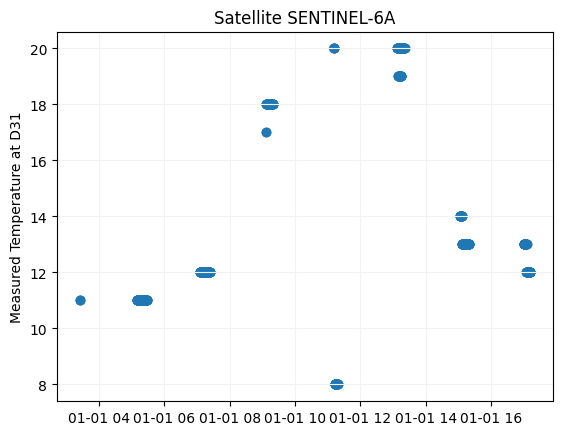

In [12]:
# import modules for plotting ...
import matplotlib.pyplot as plt
import numpy as np

# create a scatterplot of extracted Temperature values w.r.t. time
plt.scatter([at2pt(ti) for ti in t], T, alpha=0.5)
plt.grid(color='0.95')
plt.ylabel("Measured Temperature at {:}".format(diob))
plt.title("Satellite {:}".format(rnx.sat_name))
plt.show()